

https://raw.githubusercontent.com/ft-interactive/chart-doctor/master/visual-vocabulary/poster.png<BR>
from https://github.com/ft-interactive/chart-doctor/tree/master/visual-vocabulary

https://www.makeovermonday.co.uk/gallery/

https://datavizcatalogue.com/ and <BR>
https://python-graph-gallery.com/


https://extremepresentation.com/wp-content/uploads/choosing-a-good-chart-09-1.pdf
http://labs.juiceanalytics.com/chartchooser/index.html
https://blogs.mathworks.com/videos/2009/01/16/flow-chart-shows-which-visualization-to-use/

In [ ]:
# https://seaborn.pydata.org/examples/index.html
import seaborn as sns
print('sns',sns.__version__)

In [ ]:
# https://matplotlib.org/gallery.html
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
print('pandas',pd.__version__)

In [ ]:
import numpy as np
print('numpy',np.__version__)
# Fixing random state for reproducibility
np.random.seed(19680801)

In [5]:
import datetime

In [6]:
# http://geopandas.org/gallery/index.html
# https://pypi.org/project/geopandas/
# https://github.com/geopandas/geopandas
!pip install geopandas

In [7]:
import geopandas

In [8]:
# https://pypi.org/project/descartes/
!pip install  descartes

# one dimensional numeric data

## histogram

https://matplotlib.org/3.1.1/gallery/statistics/hist.html

In [9]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

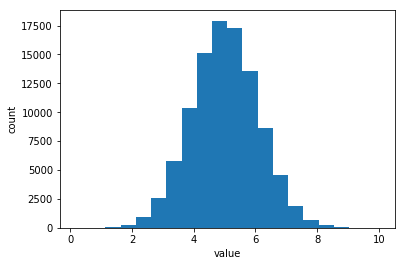

In [10]:
# We can set the number of bins with the `bins` kwarg
_=plt.hist(y, bins=n_bins)
_=plt.xlabel('value')
_=plt.ylabel('count')

# two dimensional data

## compare numeric with numeric: scatter 

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

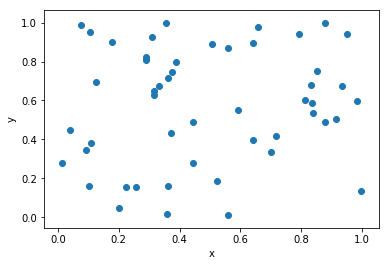

In [11]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

I advocate against using line plots, since they deceive readers into thinkg there are data points where none exist

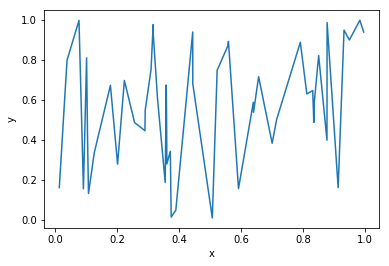

In [12]:
plt.plot(np.sort(x), y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

I adocate against using bar charts if the existance of outliers distracts the reader from finding patterns in the data

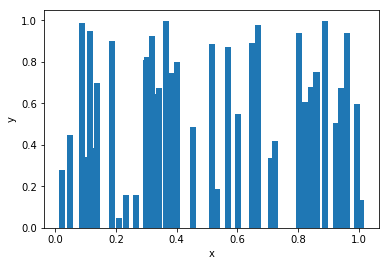

In [13]:
plt.bar(x, y, align='edge', width=0.02)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## compare categorical with numeric: bar

https://python-graph-gallery.com/10-barplot-with-number-of-observation/

http://benalexkeen.com/bar-charts-in-matplotlib/

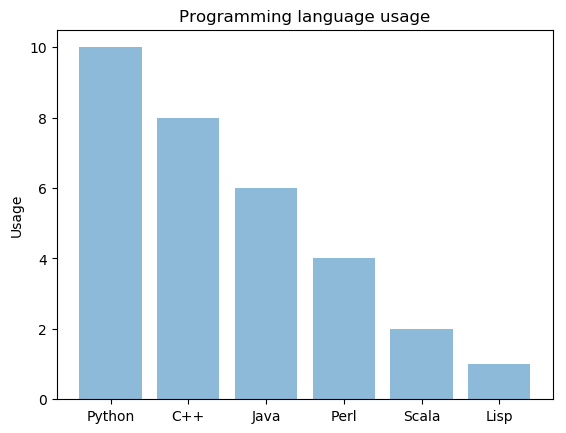

In [14]:
# https://pythonspot.com/matplotlib-bar-chart/

plt.rcdefaults()
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

I avoid use of pie charts

https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

"The brain’s not very good at comparing the size of angles and because there’s no scale, reading accurate values is difficult. As you add more segments and colors, the problem gets worse. Labels can be hard to fit, especially to smaller segments, so often legends are required."
<BR><a href="https://www.geckoboard.com/blog/pie-charts/">source</a>; see also <a href="https://www.data-to-viz.com/caveat/pie.html">this page</a>

## stacked bar

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

See also https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib

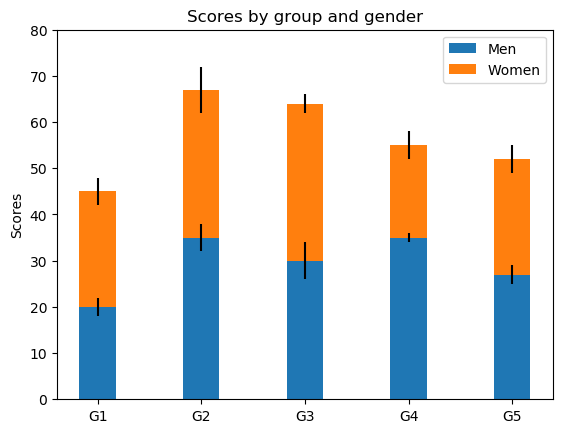

In [15]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

## radar chart

https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

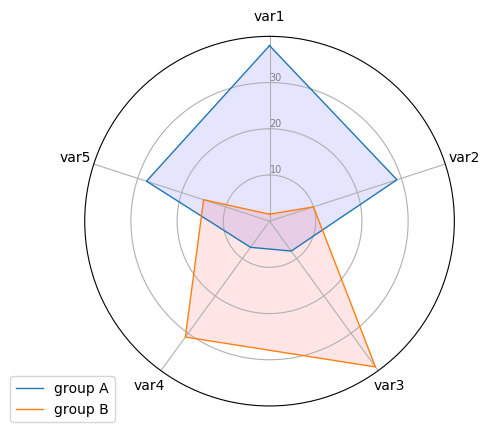

In [16]:
# Libraries
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


## compare categorical with numeric:  violin plots

https://seaborn.pydata.org/generated/seaborn.violinplot.html

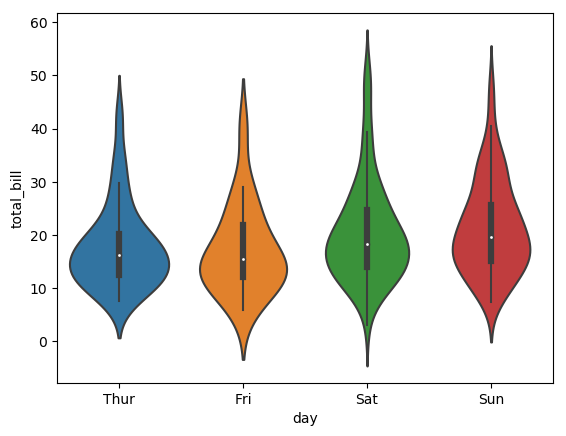

In [17]:
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## categorical versus categorical: heat maps

https://python-graph-gallery.com/heatmap/

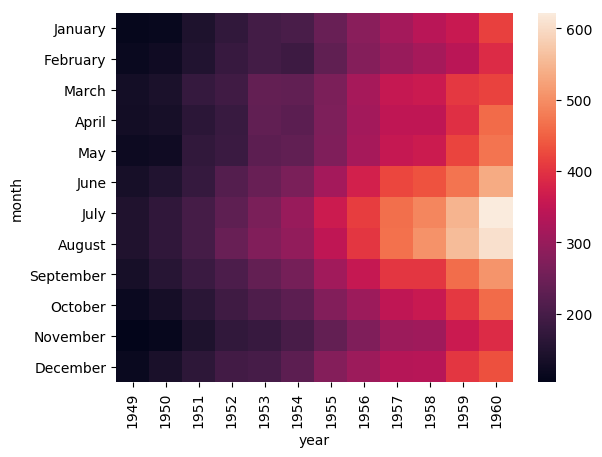

In [18]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

Including the numbers adds to readability but damages the aesthetics

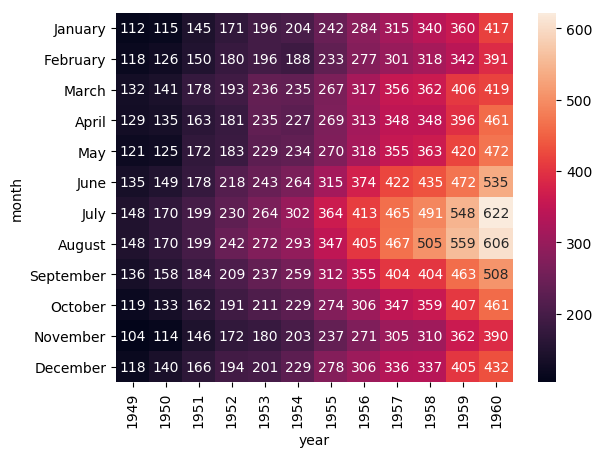

In [19]:
ax = sns.heatmap(flights, annot=True, fmt="d")

## geographic data

https://matplotlib.org/basemap/users/examples.html
https://matplotlib.org/basemap/users/geography.html
    
https://github.com/geopandas/geopandas/tree/master/examples
    
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

In [20]:
# from @vimshik1:
import geopandas as gpd   ## importing geopandas to plot longitiudes and lattitudes describing the product purchased
from shapely.geometry import Point ## import point to create a location point from latitudes and longitudes 

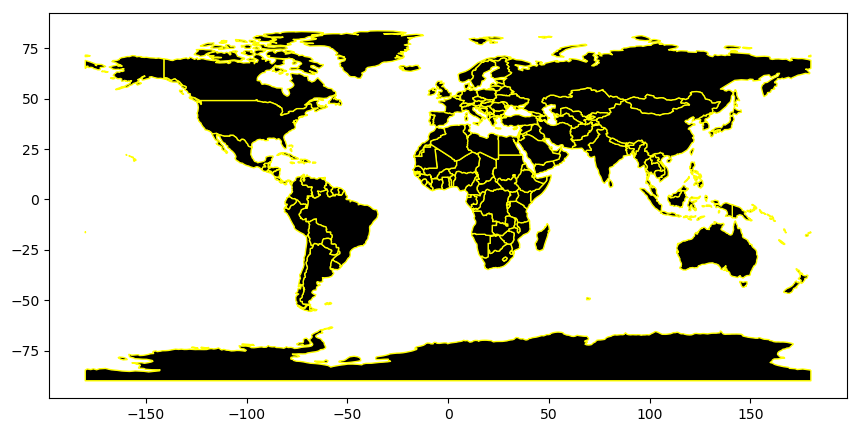

In [21]:
# from @vimshik1:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) ## Using built in world map in geopandas 
ax = world.plot(figsize=(15,5), linewidth=1 , edgecolor='yellow', color='black') ## plotting the world map giving different parameters

In [22]:
# https://support.spatialkey.com/spatialkey-sample-csv-data/
sales_2009 = pd.read_csv('http://samplecsvs.s3.amazonaws.com/SalesJan2009.csv')

In [23]:
# from @vimshik1:

def make_point(row):
    return Point(row.Longitude, row.Latitude)

# Go through every row, and make a point out of its lat and lon
points = sales_2009.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old sales_2009
# but also adding in the geometry we just made
Geo_sales= gpd.GeoDataFrame(sales_2009, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
Geo_sales.crs = {'init': 'epsg:4326'}

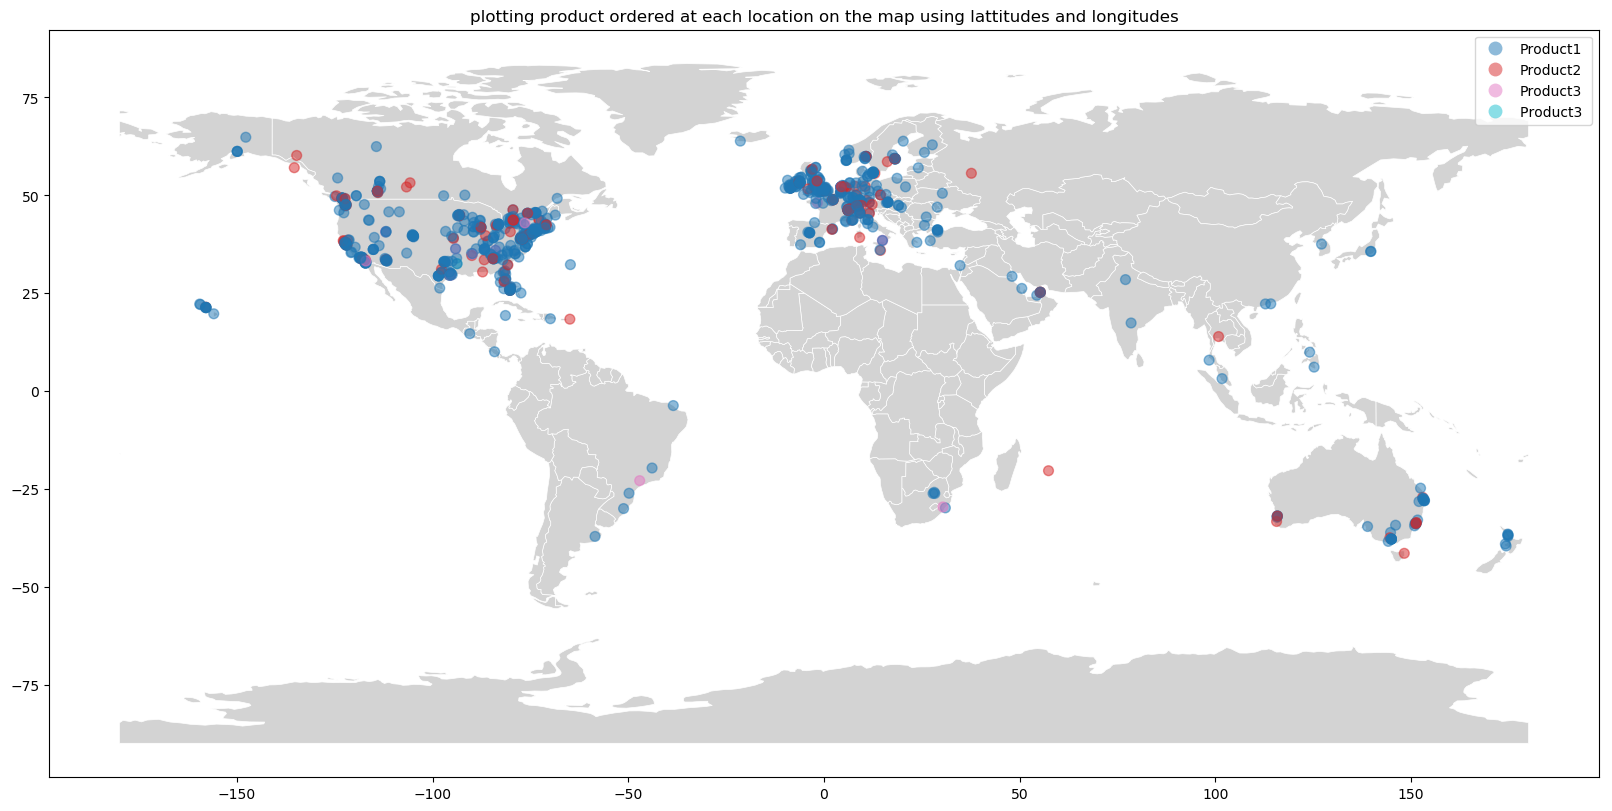

In [24]:
# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,10))
# Pass ax=ax to the second layer
Geo_sales.plot(markersize=50, alpha=0.5, ax=ax,column='Product',legend='True')
_=plt.title('plotting product ordered at each location on the map using lattitudes and longitudes')

## time series data

In [25]:
df = pd.read_excel('http://www.ercot.com/content/gridinfo/load/load_hist/erceei97.xls', skiprows=3)#, index_col=0)

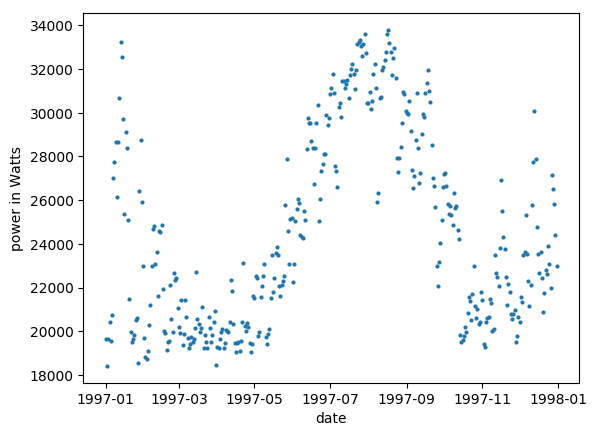

In [29]:
plt.plot_date(x=df['Date'],y=df[datetime.time(1, 0)],markersize=2);
_=plt.xlabel('date')
_=plt.ylabel('power in Watts')

### Gantt chart

https://github.com/vahtras/gantt

python-gantt : https://pypi.org/project/python-gantt/ and https://xael.org/pages/python-gantt-en.html

https://stackoverflow.com/questions/31820578/how-to-plot-stacked-event-duration-gantt-charts-using-python-pandas

https://stackoverflow.com/questions/39403580/create-gantt-chart-with-hlines

# three dimensional data

## numeric versus numeric versus numeric: bubble chart

https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

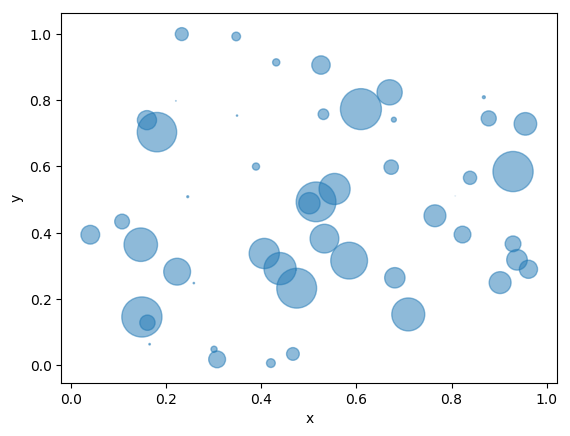

In [30]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# four dimensional data

## numeric versus numeric versus numeric versus numeric: bubble chart

https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

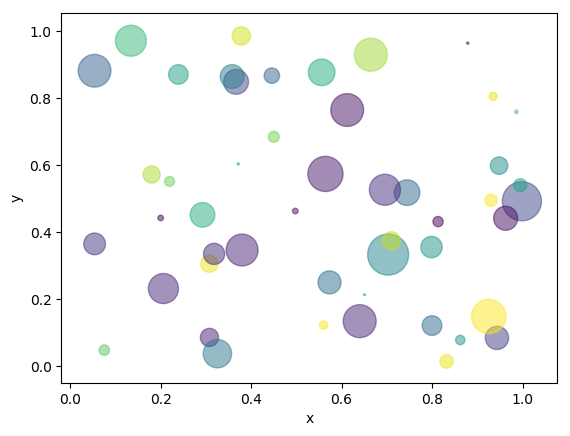

In [31]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# N-dimensional: relations

In [32]:
from graphviz import Digraph

In [33]:
# https://pypi.org/project/graphviz/

dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [34]:
print(dot.source)

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


In [35]:
dot.format = 'png'
dot.render('test-output/round-table', view=True)

'test-output/round-table.png'

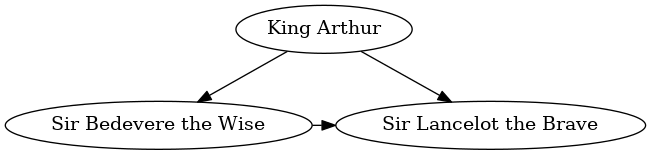

In [36]:
from IPython.display import Image
Image("test-output/round-table.png")

https://networkx.github.io/documentation/stable/tutorial.html

In [37]:
from networkx import nx

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


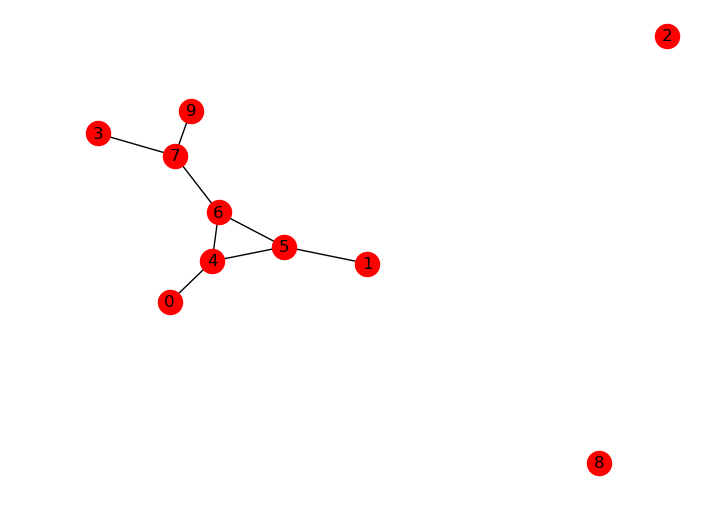

In [38]:
G = nx.gnp_random_graph(10, 0.2)
nx.draw(G, with_labels=True)
plt.show()

# animation

http://superfluoussextant.com/making-gifs-with-python.html
https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python

https://matplotlib.org/gallery/animation/dynamic_image2.html

https://ndres.me/post/matplotlib-animated-gifs-easily/

MovieWriter imagemagick unavailable. Trying to use pillow instead.


fig size: 100.0 DPI, size in inches [ 6.4  4.8]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 0


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


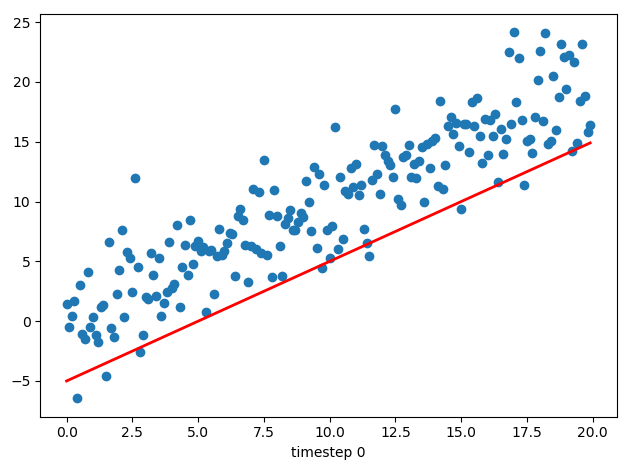

In [48]:
# https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        anim.save('line.gif', dpi=80, writer='imagemagick')
        # plt.show() will just loop the animation forever.
        plt.show()
        

http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

In [42]:
from matplotlib import animation, rc


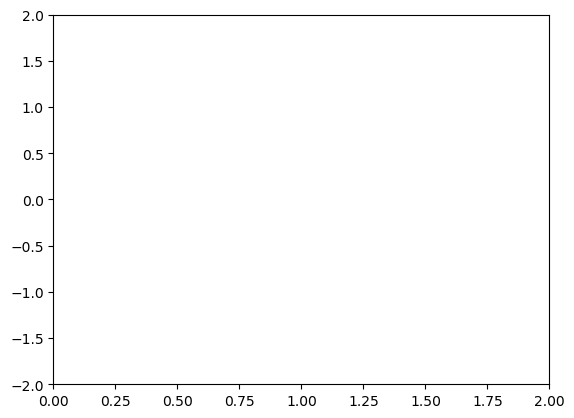

In [43]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [44]:
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
anim

In [46]:
anim.save('animation.gif', writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable. Trying to use pillow instead.


In [49]:
Image(url='animation.gif')